### Scikit-learnを用いた回帰分析

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
from sklearn import linear_model

In [8]:
# データを読み込む
data = pd.read_csv("data/cars.csv", delimiter=",", index_col=0)

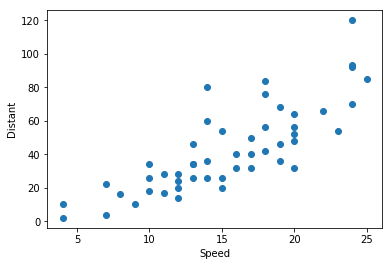

In [12]:
x = data['speed'].values.reshape(-1,1) # 独立（説明）変数　independent variable
y = data['dist'].values# 従属（目的）変数　dependent  variable
plt.scatter(x,y) # 散布図をプロット Scatter plot 
plt.xlabel("Speed")
plt.ylabel("Distant")
plt.show()

In [10]:
# 線形回帰のオブジェクト生成
reg = linear_model.LinearRegression()

# 予測モデルを作成
reg.fit(x,y)

# 回帰係数 regression coefficient
a = reg.coef_
print("回帰係数(regression coefficient):", a)

#切片　intercept
b = reg.intercept_
print("切片(intercept):", b)

# 決定係数 R-squared
print("決定係数(R-squared):",reg.score(x,y))

Ve=np.sum((y-reg.predict(x))**2)/(len(x)-2)
Sxx=np.sum((x-np.mean(x))**2)

# 回帰係数aの95%信頼区間 95% confidence interval of regression coefficient
d1=a + ss.t.ppf(q=0.025,df=len(x)-2)*np.sqrt(Ve/Sxx)
d2=a + ss.t.ppf(q=0.975,df=len(x)-2)*np.sqrt(Ve/Sxx)
print("回帰係数の信頼区間(95%-CI of regression coefficient):{},{}".format(d1,d2))

回帰係数(regression coefficient): [3.93240876]
切片(intercept): -17.57909489051095
決定係数(R-squared): 0.6510793807582509
回帰係数の信頼区間(95%-CI of regression coefficient):[3.09696433],[4.76785319]


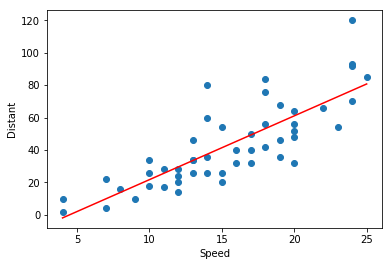

In [13]:
plt.scatter(x,y) # 散布図をプロット
plt.plot(x, reg.predict(x), color="red") # 回帰直線をプロット
plt.xlabel("Speed")
plt.ylabel("Distant")
plt.show()